In [1]:
!pip install upsetplot

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for upsetplot: filename=UpSetPlot-0.9.0-py3-none-any.whl size=24814 sha256=c0645aee0aed3f499b16fd4229400be7bb1a3141eb8974f4eae9e39be5d648e7
  Stored in directory: /root/.cache/pip/wheels/73/42/9f/1c9718ea27f30466d2787e0f7d88a7cb11942e3460c17e0ef6
Successfully built upsetplot


In [2]:
from upsetplot import generate_counts

In [3]:
example = generate_counts()

In [4]:
example

cat0   cat1   cat2 
False  False  False      56
              True      283
       True   False    1279
              True     5882
True   False  False      24
              True       90
       True   False     429
              True     1957
Name: value, dtype: int64

In [8]:
import pandas as pd
df = pd.DataFrame(example)
df

value
cat0  cat1  cat2        
False False False     56
            True     283
      True  False   1279
            True    5882
True  False False     24
            True      90
      True  False    429
            True    1957

{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: ylabel='Intersection size'>}

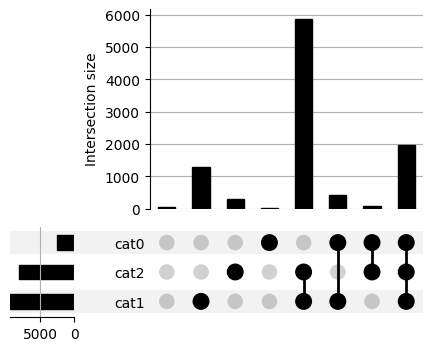

In [6]:
from upsetplot import plot
plot(example)

In [9]:
import pandas as pd

movies = pd.read_csv(
    "https://raw.githubusercontent.com/peetck/IMDB-Top1000-Movies/master/IMDB-Movie-Data.csv"
)
movies.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40


In [12]:
from upsetplot import from_memberships
movies_by_genre = from_memberships(movies.Genre.str.split(","), data=movies)
movies_by_genre

Rank  \
Action Adventure Animation Biography Comedy Crime Drama Family Fantasy History Horror Music Musical Mystery Romance Sci-Fi Sport Thriller War   Western         
True   True      False     False     False  False False False  False   False   False  False False   False   False   True   False False    False False       1   
False  True      False     False     False  False False False  False   False   False  False False   True    False   True   False False    False False       2   
       False     False     False     False  False False False  False   False   True   False False   False   False   False  False True     False False       3   
                 True      False     True   False False True   False   False   False  False False   False   False   False  False False    False False       4   
True   True      False     False     False  False False False  True    False   False  False False   False   False   False  False False    False False       5   
...                                                                                                                                                       ...   
False  False     False     False     False  True  True  False  False   False   False  False False   True    False   False  False False    False False     996   
                                            False False False  False   False   True   False False   False   False   False  False False    False False     997   
                                                  True  False  False   False   False  True  False   False   True    False  False False    False False     998   
       True      False     False     True   False False False  False   False   False  False False   False   False   False  False False    False False     999   
       False     False     False     True   False False True   True    False   False  False False   False   False   False  False False    False False    1000   

                                                                                                                                                                           Title  \
Action Adventure Animation Biography Comedy Crime Drama Family Fantasy History Horror Music Musical Mystery Romance Sci-Fi Sport Thriller War   Western                            
True   True      False     False     False  False False False  False   False   False  False False   False   False   True   False False    False False    Guardians of the Galaxy   
False  True      False     False     False  False False False  False   False   False  False False   True    False   True   False False    False False                 Prometheus   
       False     False     False     False  False False False  False   False   True   False False   False   False   False  False True     False False                      Split   
                 True      False     True   False False True   False   False   False  False False   False   False   False  False False    False False                       Sing   
True   True      False     False     False  False False False  True    False   False  False False   False   False   False  False False    False False              Suicide Squad   
...                                                                                                                                                                          ...   
False  False     False     False     False  True  True  False  False   False   False  False False   True    False   False  False False    False False       Secret in Their Eyes   
                                            False False False  False   False   True   False False   False   False   False  False False    False False            Hostel: Part II   
                                                  True  False  False   False   False  True  False   False   True    False  False False    False False     Step Up 2: The Streets   
       True      False     False     True   False False False  False   False   

{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: ylabel='Intersection size'>}

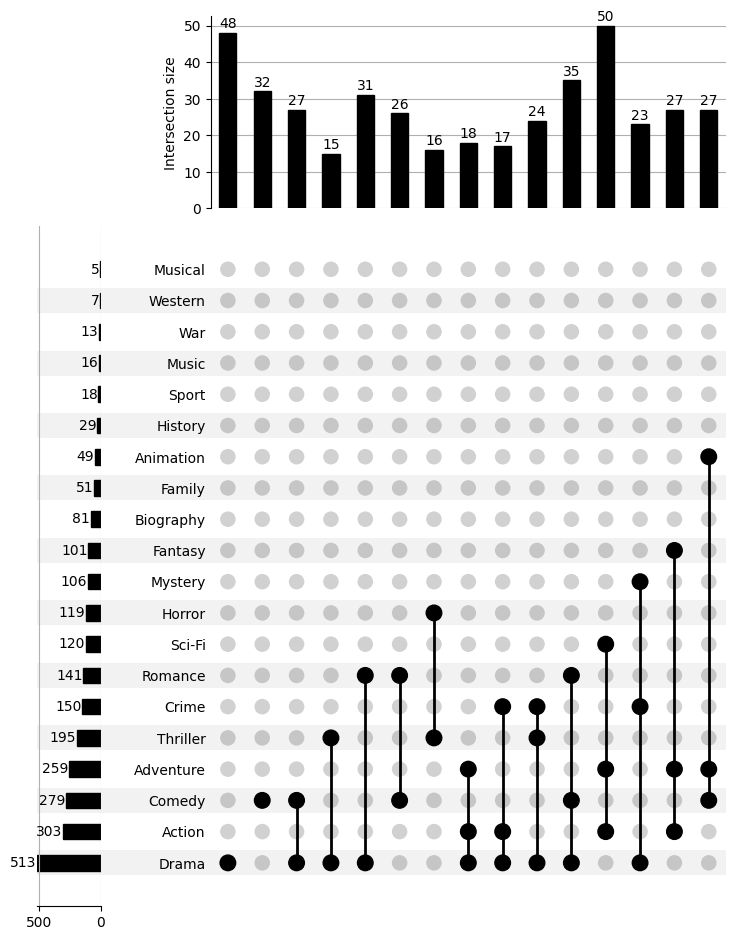

In [13]:
UpSet(movies_by_genre, min_subset_size=15, show_counts=True).plot()

In [14]:
genre_indicators = pd.DataFrame(
    [{cat: True for cat in cats} for cats in movies.Genre.str.split(",").values]
).fillna(False)
genre_indicators

,Action,Adventure,Sci-Fi,Mystery,Horror,Thriller,Animation,Comedy,Family,Fantasy,Drama,Music,Biography,Romance,History,Crime,Western,War,Musical,Sport
0,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False
4,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False
996,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False
998,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
from upsetplot import from_indicators

# this produces the same result as from_memberships above
movies_by_genre = from_indicators(genre_indicators, data=movies)

In [16]:
movies_with_indicators = pd.concat([movies, genre_indicators], axis=1)
movies_with_indicators

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,...,Drama,Music,Biography,Romance,History,Crime,Western,War,Musical,Sport
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,...,False,False,False,False,False,False,False,False,False,False
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,...,False,False,False,False,False,False,False,False,False,False
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,...,False,False,False,False,False,False,False,False,False,False
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,...,False,False,False,False,False,False,False,False,False,False
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,...,True,False,False,False,False,True,False,False,False,False
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,...,False,False,False,False,False,False,False,False,False,False
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,...,True,True,False,True,False,False,False,False,False,False
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,...,False,False,False,False,False,False,False,False,False,False


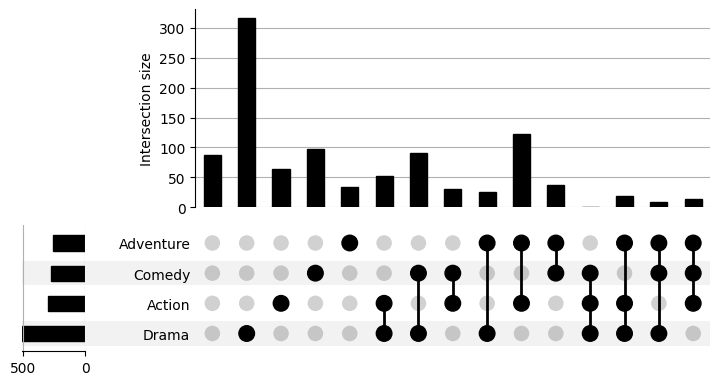

In [17]:
UpSet(
    from_indicators(
        ["Drama", "Action", "Comedy", "Adventure"], data=movies_with_indicators
    )
)

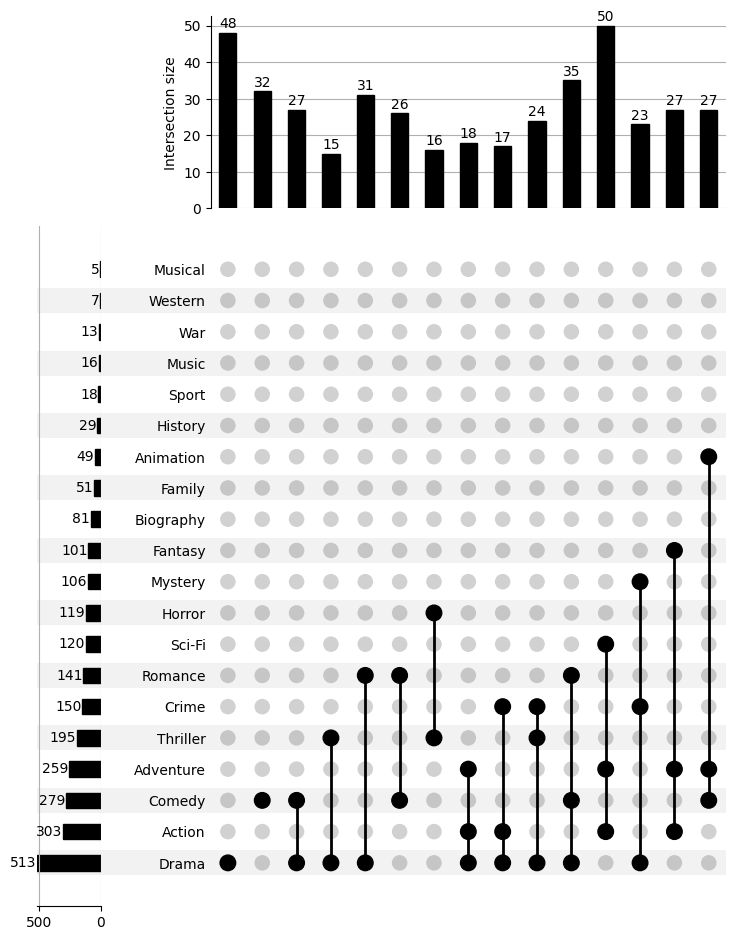

In [18]:
UpSet(
    from_indicators(lambda df: df.select_dtypes(bool), data=movies_with_indicators),
    min_subset_size=15,
    show_counts=True,
)